# Implementation for multiple samples

## Load dataset

In [52]:
import random

In [18]:
advertising = np.genfromtxt('advertising.csv', delimiter= ',').tolist()
advertising[:5]

[[nan, nan, nan, nan],
 [230.1, 37.8, 69.2, 22.1],
 [44.5, 39.3, 45.1, 10.4],
 [17.2, 45.9, 69.3, 12.0],
 [151.5, 41.3, 58.5, 16.5]]

In [19]:
advertising = np.genfromtxt('advertising.csv', delimiter= ',', skip_header= 1).tolist()
advertising[:5]

[[230.1, 37.8, 69.2, 22.1],
 [44.5, 39.3, 45.1, 10.4],
 [17.2, 45.9, 69.3, 12.0],
 [151.5, 41.3, 58.5, 16.5],
 [180.8, 10.8, 58.4, 17.9]]

In [58]:
def get_column(data, index): 
    return [row[index] for row in data]

data_tv = get_column(advertising, 0)
print(data_tv[:5])
data_radio = get_column(advertising, 1)
print(data_radio[:5])
data_newspaper = get_column(advertising, 2)
print(data_newspaper[:5])
data_sales = get_column(advertising, 3)
print(data_sales[:5])
N = len(data_sales)
print(N)

[230.1, 44.5, 17.2, 151.5, 180.8]
[37.8, 39.3, 45.9, 41.3, 10.8]
[69.2, 45.1, 69.3, 58.5, 58.4]
[22.1, 10.4, 12.0, 16.5, 17.9]
200


## Initialize parameters

In [56]:
def initialize_params(): 
    w1 = random.gauss(mu = 0.0, sigma = 0.1)
    w2 = random.gauss(mu = 0.0, sigma = 0.1)
    w3 = random.gauss(mu = 0.0, sigma = 0.1)
    b = 0 
    return w1, w2, w3, b

w1, w2, w3, b = initialize_params()
print(w1, w2, w3, b)

-0.21241838755080417 -0.08001814120115092 -0.14398028549960354 0


## Training

In [64]:
def predict(w1, x1, w2, x2, w3, x3, b): 
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def gradient(x1, x2, x3, y_hat, y): 
    dw1 = 2 * x1 * (y_hat - y)
    dw2 = 2 * x2 * (y_hat - y)
    dw3 = 2 * x3 * (y_hat - y)
    db = 2 * (y_hat - y)
    return dw1, dw2, dw3, db

def compute_loss(y_hat, y): 
    return (y_hat - y)**2 / 2

def update_weights(lr, w1, w2, w3, dw1, dw2, dw3, db, b): 
    w1 = w1 - dw1 * lr
    w2 = w2 - dw2 * lr
    w3 = w3 - dw3 * lr
    b = b - db * lr 
    return w1, w2, w3, b

In [66]:
epoches_max = 100 
w1, w2, w3, b = initialize_params()
lr = 0.02 
losses = []

for epoch in range(epoches_max):
    for i in range(N): 
        # get data
        data_tv_i = data_tv[i]
        data_newspaper_i = data_newspaper[i]
        data_radio_i = data_radio[i]
        data_sales_i = data_sales[i]

        # predict 
        y_hat = predict(w1, data_tv_i, w2, data_newspaper_i, w3, data_radio_i, b)

        # compute_loss
        loss = compute_loss(y_hat, data_sales_i)
        print(loss)
        losses.append(loss)

        dw1, dw2, dw3, db = gradient(data_tv_i, data_newspaper_i, data_radio_i, y_hat, data_sales_i)

        dw1, dw2, dw3, b = update_weights(lr, w1, w2, w3, dw1, dw2, dw3, db, b)

175.00033995296
53.361956061543
97.01576755390903
84.39907333761629
95.93991041603569
32.714437596282565
28.781033223272466
19.469076350369924
0.3775659464353615
24.818466415318255
32.830827366576614
17.33225756664799
28.990963063202553
18.402006557129916
48.08733367035227
86.3990947317576
66.0111774738472
70.77861199127419
4.145996785791054
6.3237660730145775
24.043262932626806
8.295809448064592
0.2091940729822611
24.598558496127
0.26582225765923345
2.058548063336828
3.0382397488860264
19.970490801605177
6.06169831826619
2.3974210755779066
16.784226211792912
1.505068357833623
5.494162911176918
0.197799332821979
0.05296910703734783
0.0017098704121898134
24.277929073465494
11.645622540755433
0.4443844383048275
17.513823577090584
2.0351183394001753
5.85687318622556
0.2533484798189917
4.417278576151114
0.005682365689519376
2.0162842675683246
0.019565863854639227
15.04005147310394
14.05314322037934
0.3013045996682402
1.7288217600030111
5.157564572103907
23.10415990312053
27.656541546154333

In [73]:
print(w1, w2, w3, b)

0.03155263128758123 -0.07222405124351587 0.02987668734571223 11.610871976345129


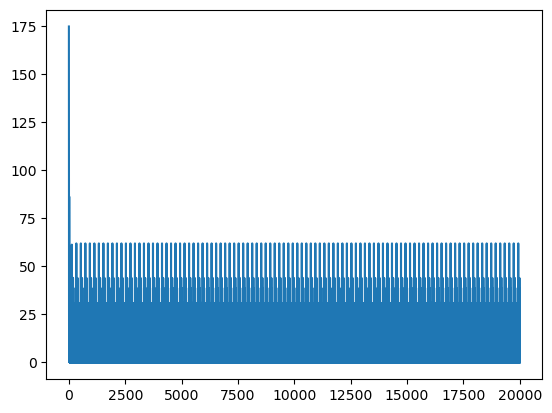

In [67]:
plt.plot(losses)

## Testing

In [72]:
x1, x2, x3, y = 184.9, 43.9, 1.7, 20.7
y_hat = x1 * w1 + x2 * w2 + x3 * w3 + b
print(y_hat)

14.32510802031626
